<a href="https://colab.research.google.com/github/Joyce-Chir/Data-Analysis-Start/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Python Data Analysis framework...in a nutshell

#NumPy - FAST NUMERICAL ARRAYS AND MATH OPERATIONS
#why use numpy? - underpins almost every other data tool; handles large, multi-dimensional data effectively.
#to install the libraries we use !pip or pip
import numpy as np

#create a 1D array and compute its mean

data = np.array([10, 20, 30, 40])
print("Mean:", data.mean())

Mean: 25.0


In [ ]:
#Python Data Analysis framework...in a nutshell

#Pandas - Tabular(spreadsheet-style) data structures and tools
#why use pandas - easy to import/export (csvs, excels, sql), slicing, grouping and summarizing

import pandas as pd

#load csv into a dataframe and show summary stats

df = pd.read_csv("/content/Sales Dataset.csv")
print(df.head()) #first 5 rows

  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electronics  Electronic Games   
1  B-26776    9726    1275         5  Electronics  Electronic Games   
2  B-26776    9726    1275         5  Electronics  Electronic Games   
3  B-26776    4975    1330        14  Electronics          Printers   
4  B-26776    4975    1330        14  Electronics          Printers   

  PaymentMode  Order Date   CustomerName     State     City Year-Month  
0         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
1         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  
2         UPI  2021-07-25   Robert Stone  New York  Buffalo    2021-07  
3         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
4         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  


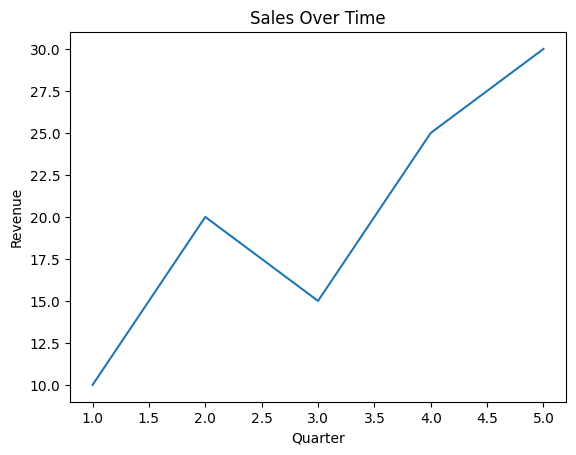

In [ ]:
#Matplotlib
#why matplotlib
#matplotlib - it's a core plotting liobrary for charts, and graphs
#why use matplotlib - highly customizables: foundation for higher-level viz tools

import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]

plt.plot(x, y)
plt.title("Sales Over Time")

plt.xlabel("Quarter")
plt.ylabel("Revenue")

plt.show()

In [ ]:
#plt.plot(df['Amount'], df['Profit'])
#plt.title("Amount-Profit Table")
#plt.xlabel("Profit")
#plt.ylabel("Quantity")
#plt.show()



<ipython-input-6-062e7ed76e41>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/Sales Dataset.csv", parse_dates=True, index_col=0)


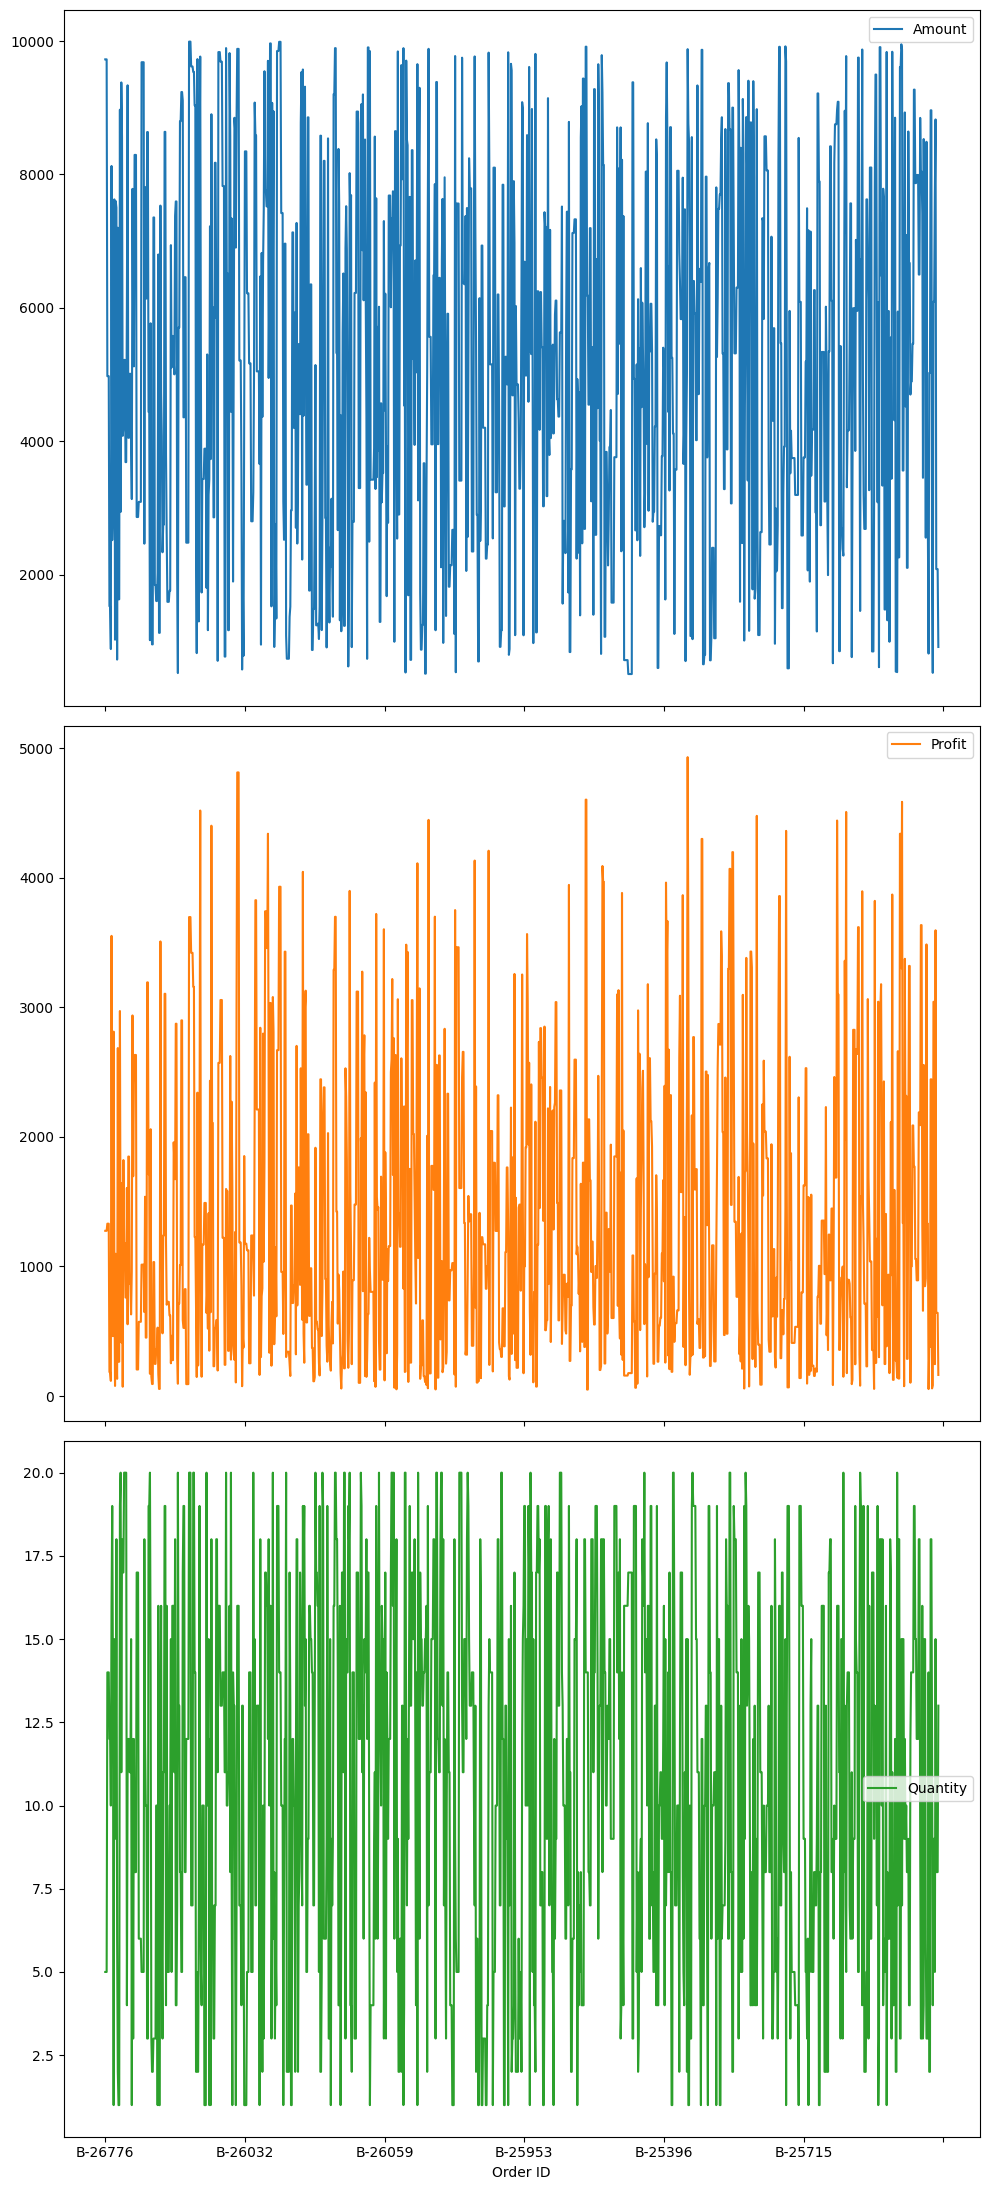

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Sales Dataset.csv", parse_dates=True, index_col=0)

#quick one-line plot all of the numerical columns

df.plot(subplots=True, figsize=(10, 2 * len(df.columns)))
plt.tight_layout()
plt.show()

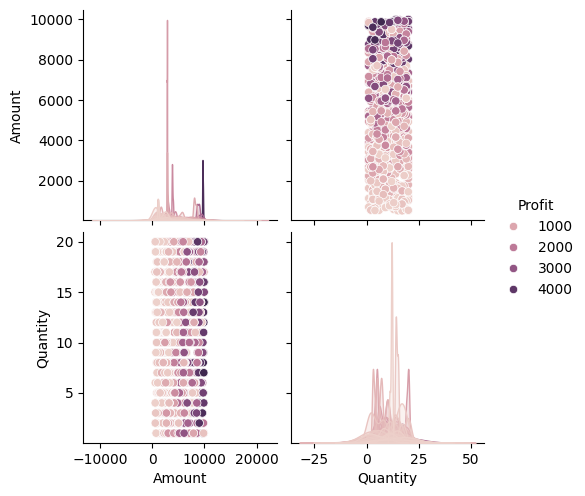

In [ ]:
# seaborn  = statistical viz built on matplotlib
#we need to use because it's an easier syntax for common plots (heatmaps, distribution plots etc)

import pandas as pd
import seaborn as sns

df = pd.read_csv("Sales Dataset.csv")

sns.pairplot(df, hue="Profit")
plt.show()

Dataset shape: (1194, 12)
Columns: ['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category', 'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City', 'Year-Month']
Data types:
Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
Order Date      object
CustomerName    object
State           object
City            object
Year-Month      object
dtype: object

First few rows:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electronics  Electronic Games   
1  B-26776    9726    1275         5  Electronics  Electronic Games   
2  B-26776    9726    1275         5  Electronics  Electronic Games   
3  B-26776    4975    1330        14  Electronics          Printers   
4  B-26776    4975    1330        14  Electronics          Printers   

  PaymentMode  Order Date   CustomerName     State     City Year-Month

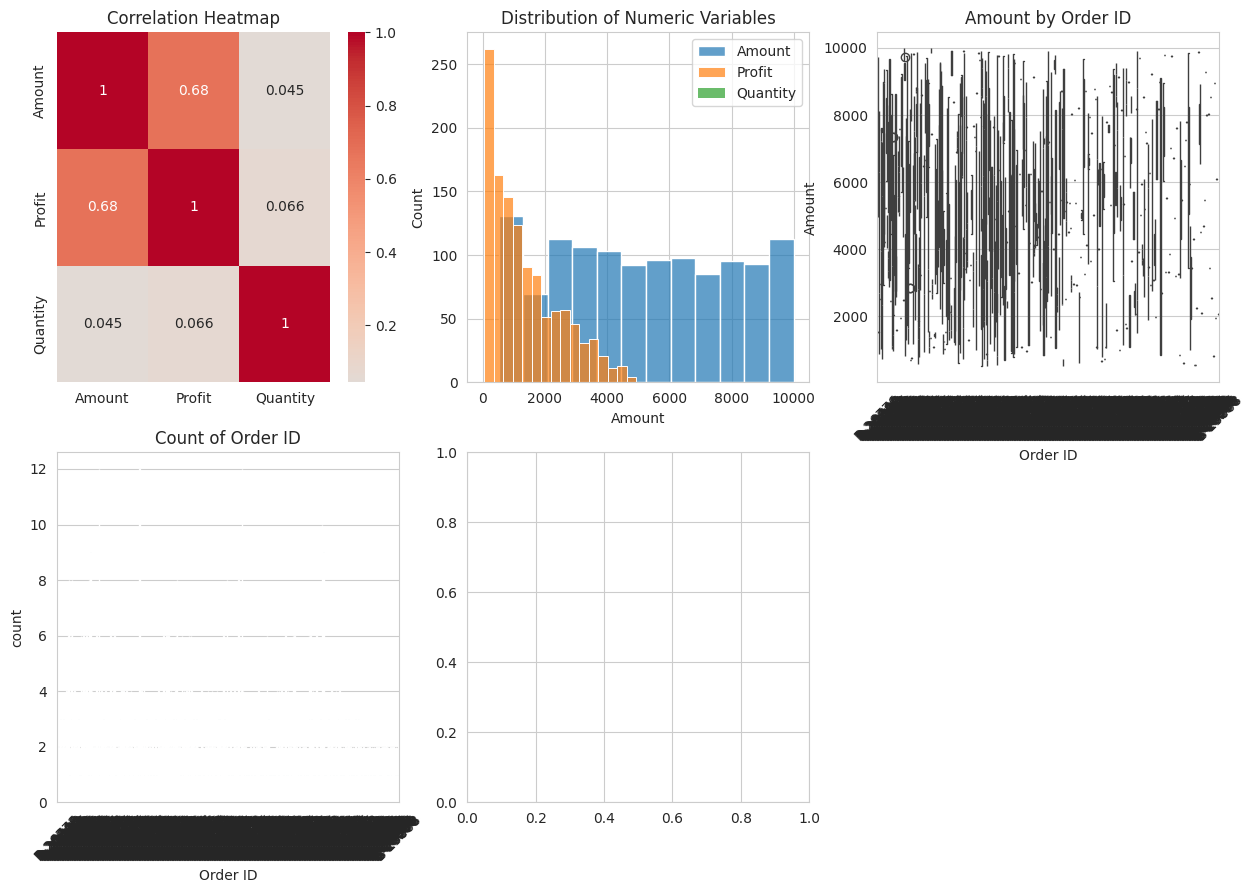

<Figure size 1000x800 with 0 Axes>

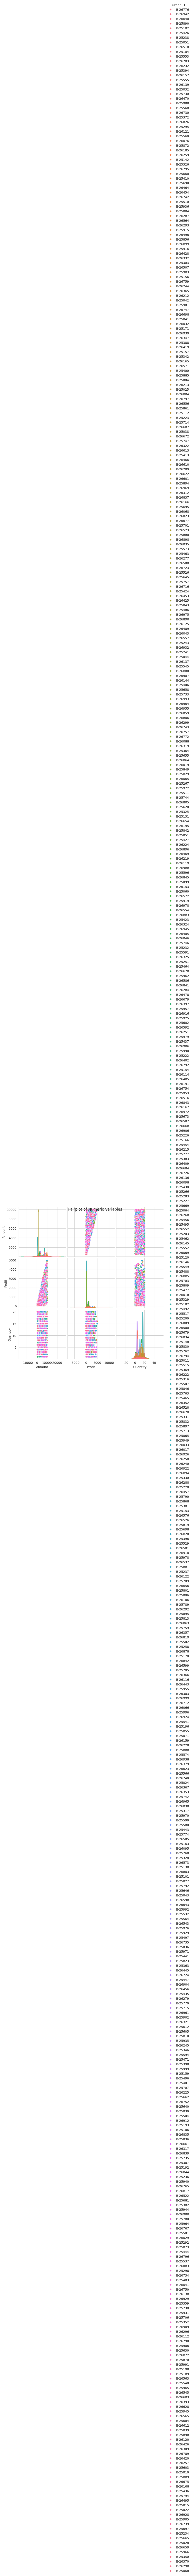

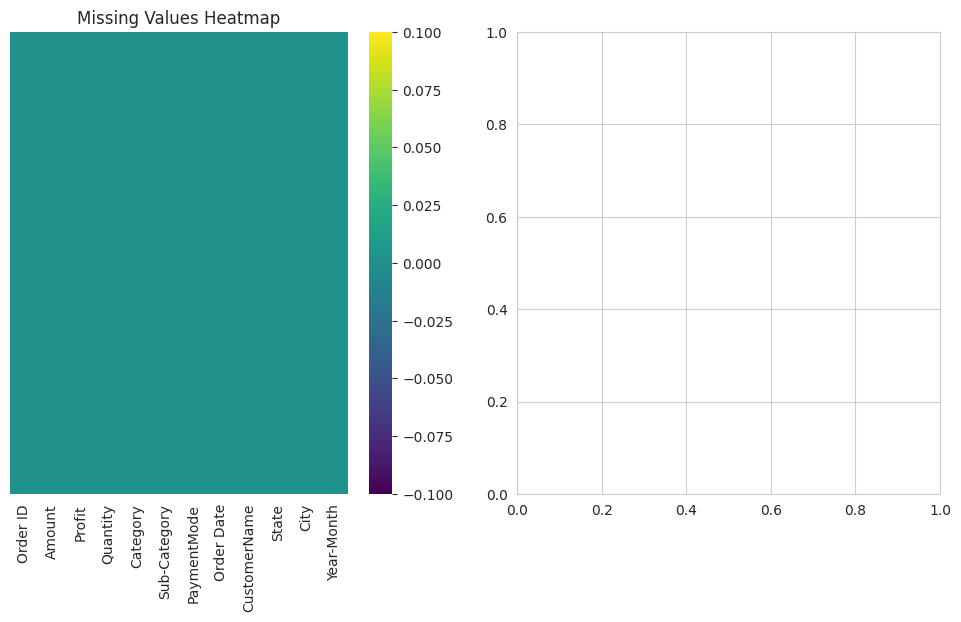

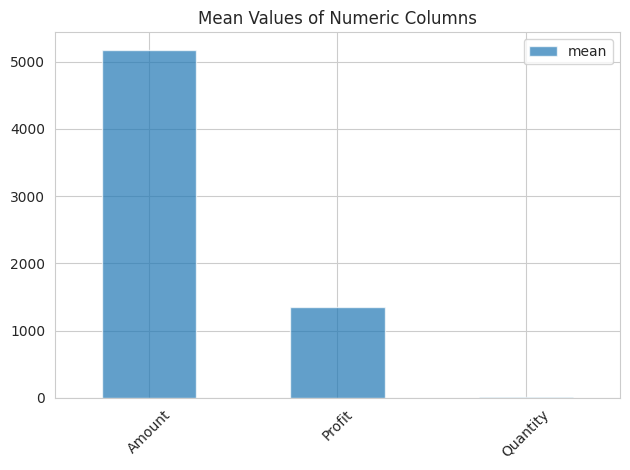


Missing values per column:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

Summary statistics:
            Amount       Profit     Quantity
count  1194.000000  1194.000000  1194.000000
mean   5178.089615  1348.992462    10.674204
std    2804.921955  1117.992573     5.777102
min     508.000000    50.000000     1.000000
25%    2799.000000   410.000000     6.000000
50%    5152.000000  1014.000000    11.000000
75%    7626.000000  2035.000000    16.000000
max    9992.000000  4930.000000    20.000000


In [ ]:
# Dynamic CSV visualization with seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def visualize_csv(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Basic info about the dataset
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes}")
    print(f"\nFirst few rows:")
    print(df.head())

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    print(f"\nNumeric columns: {numeric_cols}")
    print(f"Categorical columns: {categorical_cols}")

    # Set up the plotting style
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))

    # 1. Correlation heatmap for numeric columns
    if len(numeric_cols) > 1:
        plt.subplot(2, 3, 1)
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')

    # 2. Distribution plots for numeric columns
    if len(numeric_cols) > 0:
        plt.subplot(2, 3, 2)
        for col in numeric_cols[:3]:  # Show first 3 numeric columns
            sns.histplot(df[col], alpha=0.7, label=col)
        plt.title('Distribution of Numeric Variables')
        plt.legend()

    # 3. Box plots for numeric vs categorical
    if len(numeric_cols) > 0 and len(categorical_cols) > 0:
        plt.subplot(2, 3, 3)
        sns.boxplot(data=df, x=categorical_cols[0], y=numeric_cols[0])
        plt.title(f'{numeric_cols[0]} by {categorical_cols[0]}')
        plt.xticks(rotation=45)

    # 4. Count plot for categorical variables
    if len(categorical_cols) > 0:
        plt.subplot(2, 3, 4)
        sns.countplot(data=df, x=categorical_cols[0])
        plt.title(f'Count of {categorical_cols[0]}')
        plt.xticks(rotation=45)

    # 5. Pairplot for numeric columns (if manageable number)
    if len(numeric_cols) > 1 and len(numeric_cols) <= 5:
        plt.subplot(2, 3, 5)
        # Create a smaller figure for pairplot
        plt.figure(figsize=(10, 8))
        if len(categorical_cols) > 0:
            sns.pairplot(df, vars=numeric_cols, hue=categorical_cols[0])
        else:
            sns.pairplot(df, vars=numeric_cols)
        plt.suptitle('Pairplot of Numeric Variables')

    # 6. Missing values heatmap
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')

    # 7. Summary statistics visualization
    plt.subplot(1, 2, 2)
    if len(numeric_cols) > 0:
        df[numeric_cols].describe().T.plot(kind='bar', y='mean', alpha=0.7)
        plt.title('Mean Values of Numeric Columns')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Additional insights
    print(f"\nMissing values per column:")
    print(df.isnull().sum())

    if len(numeric_cols) > 0:
        print(f"\nSummary statistics:")
        print(df[numeric_cols].describe())

# Usage
visualize_csv("Sales Dataset.csv")

In [ ]:
#Scikit-Learn

#machine-learning library/data analysis tool with tools for modelling and evaluation
#reason for using scikit-learn = standardized api for clustering, regresion, classification and preprocessing

from sklearn.linear_model import LinearRegression
import numpy as np

#simple linear fit

x = np.array([[1], [2], [3], [4]]) #linear matrix
y = np.array([2, 4, 6, 8]) #target vectors

model = LinearRegression().fit(x, y)

print("Slope: ", model.coef_[0])

Slope:  2.0
